<a href="https://colab.research.google.com/github/dbright123/Dbot-Advance/blob/main/lstm_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import MetaTrader5 as mt5
import numpy as np
import pandas as pd





In [2]:
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)

trade_active = mt5.initialize()

print(trade_active)

if not trade_active:
    print('Initialization failed, check internet connection. You must have Meta Trader 5 installed.')
    mt5.shutdown()

else:
    print(mt5.account_info()._asdict())
    print("\n")
    print(mt5.terminal_info()._asdict())
    print("\n")
    print(mt5.symbols_total())

MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.4200
True
{'login': 213644473, 'trade_mode': 0, 'leverage': 1000, 'limit_orders': 500, 'margin_so_mode': 0, 'trade_allowed': True, 'trade_expert': True, 'margin_mode': 2, 'currency_digits': 2, 'fifo_close': False, 'balance': 200.0, 'credit': 0.0, 'profit': 0.0, 'equity': 200.0, 'margin': 0.0, 'margin_free': 200.0, 'margin_level': 0.0, 'margin_so_call': 25.0, 'margin_so_so': 15.0, 'margin_initial': 0.0, 'margin_maintenance': 0.0, 'assets': 0.0, 'liabilities': 0.0, 'commission_blocked': 0.0, 'name': 'micheal bright omage ', 'server': 'OctaFX-Demo', 'currency': 'USD', 'company': 'Octa Markets Incorporated'}


{'community_account': False, 'community_connection': False, 'connected': True, 'dlls_allowed': False, 'trade_allowed': True, 'tradeapi_disabled': False, 'email_enabled': False, 'ftp_enabled': False, 'notifications_enabled': False, 'mqid': True, 'build': 5370, 'maxbars': 100000000, 'codepage': 0, 'ping_last

In [3]:
account = mt5.account_info()
terminal = mt5.terminal_info()

print(account.equity)

if(terminal.connected == True or terminal.trade_allowed == True):
    print("AI is successfully functional")
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")

200.0
AI is successfully functional


In [4]:
t_s = "BTCUSD"
market = mt5.copy_rates_from_pos(t_s, mt5.TIMEFRAME_M5, 0, 10000000)
#display(market)
print(market.shape)

print(t_s)




(721286,)
BTCUSD


In [5]:
market

array([(1311242400, 1.3690000e+01, 1.3780000e+01, 1.3400000e+01, 1.3610000e+01,  69,    0, 0),
       (1311328800, 1.3610000e+01, 1.3810000e+01, 1.3450000e+01, 1.3700000e+01,  64,    0, 0),
       (1311415200, 1.3700000e+01, 1.3760000e+01, 1.3510000e+01, 1.3680000e+01,  49,    0, 0),
       ...,
       (1761506400, 1.1368225e+05, 1.1372665e+05, 1.1363453e+05, 1.1363883e+05, 649, 2255, 0),
       (1761506700, 1.1363888e+05, 1.1367094e+05, 1.1362678e+05, 1.1362703e+05, 630, 2257, 0),
       (1761507000, 1.1362704e+05, 1.1364844e+05, 1.1360064e+05, 1.1363694e+05, 271, 2261, 0)],
      dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])

In [6]:
data = []
for i in range(len(market)):
    data.append([market[i][1],market[i][2],market[i][3],market[i][4]])
df = pd.DataFrame(data, columns=["open", "high","low", "close"])
df.to_csv("Generated"+t_s+" dbot.csv", index=False)

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
print(tf.__version__)


2.20.0


In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
import os
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scaler3d2d import preprocess_and_save_scalers,transform_data, inverse_transform_data,create_sequences



In [11]:
from tensorflow.keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt



from tensorflow.keras import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, LayerNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
import keras

In [12]:
t_symbol = ["BTCUSD"]

In [13]:


def engineer_features_5min_btc(df):
    """
    Input: df with columns ['timestamp', 'open', 'high', 'low', 'close', 'volume']
    Output: df with 68 features
    """

    # GROUP 1: Core Price Features
    df['typical_price'] = (df['high'] + df['low'] + df['close']) / 3

    # GROUP 7: Support/Resistance Features
    df['pivot_point'] = (df['high'].shift(1) + df['low'].shift(1) + df['close'].shift(1)) / 3
    
    return df

# Usage:
# df = pd.read_csv('btcusd_5min.csv')
# df = engineer_features_5min_btc(df)

In [20]:
n = 0
m_label = "Generated"+t_symbol[n]
train_df = pd.read_csv(m_label+ " dbot.csv")[["close"]]
#train_df = engineer_features_5min_btc(train_df[["open","high","low","close"]])[100000:]

In [21]:
train_df

,close
0,13.61
1,13.70
2,13.68
3,13.98
4,14.05
...,...
721281,113666.63
721282,113686.85
721283,113638.83
721284,113627.03


In [22]:

#train_df_test = train_dfs_test[n]
print(m_label)
SEQ_LEN = 480 # length of input sequence (timesteps). Typical choices: 30, 60, 90
n_rows, n_features = train_df.values.shape


X, y = create_sequences(train_df.values/1111111, SEQ_LEN, 1, 0 )  
train_df = None
n_samples = X.shape[0]
#print(X[-1])
print(y[-1])

GeneratedBTCUSD
[0.10227326]


In [23]:
print(X[-1])

[[0.09992462]
 [0.09990766]
 [0.09984119]
 [0.0997898 ]
 [0.09976397]
 [0.09976861]
 [0.09977779]
 [0.0996629 ]
 [0.09972708]
 [0.09974112]
 [0.09985348]
 [0.09964445]
 [0.09971809]
 [0.09976909]
 [0.09973083]
 [0.09982238]
 [0.09983103]
 [0.09995675]
 [0.10001058]
 [0.09990666]
 [0.09989851]
 [0.09988097]
 [0.09993974]
 [0.09995229]
 [0.09998541]
 [0.09998605]
 [0.09992231]
 [0.09989787]
 [0.09992595]
 [0.09990527]
 [0.09992242]
 [0.09990978]
 [0.09991005]
 [0.09990839]
 [0.09996892]
 [0.09998298]
 [0.0999495 ]
 [0.1000043 ]
 [0.09998708]
 [0.09997178]
 [0.10004085]
 [0.09995652]
 [0.09999975]
 [0.10000756]
 [0.09998241]
 [0.10000158]
 [0.09999071]
 [0.09991346]
 [0.09993029]
 [0.09997293]
 [0.10004313]
 [0.1000898 ]
 [0.100288  ]
 [0.10024035]
 [0.10017656]
 [0.10016664]
 [0.10021778]
 [0.1001681 ]
 [0.10018918]
 [0.10018778]
 [0.10012041]
 [0.100075  ]
 [0.10005313]
 [0.10004063]
 [0.100032  ]
 [0.10007208]
 [0.10008792]
 [0.10015453]
 [0.10017118]
 [0.10017237]
 [0.10019832]
 [0.10

In [ ]:
#X, y = preprocess_and_save_scalers(X, y)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=False)
X_val, X_test, y_val,  y_test = train_test_split(X_test, y_test, test_size=0.01, random_state=0, shuffle=False)
X = None
y = None
seq_len = X_train.shape[1]
n_features = X_train.shape[2]
output_dim = y_train.shape[1]

i = Input(shape=(seq_len, n_features))

X = Bidirectional(LSTM(64, return_sequences=True))(i)
X = BatchNormalization()(X)
X = Dropout(0.3)(X)

X = Bidirectional(LSTM(64))(X)
X = BatchNormalization()(X)
X = Dropout(0.3)(X)

X = Dense(50, activation="relu")(X)
X = Dropout(0.3)(X)

X = Dense(output_dim)(X)

model = Model(i, X)
model.summary()


I0000 00:00:1761500586.122686    6326 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5561 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 480, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 480, 128)       │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 480, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 480, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,133 (547.39 KB)

 Trainable params: 139,621 (545.39 KB)

 Non-trainable params: 512 (2.00 KB)

In [26]:

es = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=2)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-6, verbose=2)
mc = ModelCheckpoint(m_label + 'lstm_best.keras', monitor='val_loss', save_best_only=True, verbose=2)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae',tf.keras.metrics.RootMeanSquaredError(),'mape','msle'])
r = model.fit(
  X_train, y_train,
  validation_data=(X_val, y_val),
  epochs=100,
  batch_size=256,
  callbacks=[es, rlr, mc ],
  verbose=1

)

Epoch 1/100
1887/1887 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.0228 - mae: 0.0589 - mape: 1047.8842 - msle: 0.0072 - root_mean_squared_error: 0.1261
Epoch 1: val_loss improved from None to 0.00027, saving model to GeneratedBTCUSDlstm_best.keras
1887/1887 ━━━━━━━━━━━━━━━━━━━━ 266s 139ms/step - loss: 0.0048 - mae: 0.0218 - mape: 392.7311 - msle: 0.0017 - root_mean_squared_error: 0.0693 - val_loss: 2.6896e-04 - val_mae: 0.0143 - val_mape: 19.8609 - val_msle: 2.3249e-04 - val_root_mean_squared_error: 0.0164 - learning_rate: 0.0010
Epoch 2/100
1887/1887 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 4.8956e-05 - mae: 0.0043 - mape: 78.6266 - msle: 4.1221e-05 - root_mean_squared_error: 0.0070
Epoch 2: val_loss improved from 0.00027 to 0.00005, saving model to GeneratedBTCUSDlstm_best.keras
1887/1887 ━━━━━━━━━━━━━━━━━━━━ 265s 141ms/step - loss: 3.8822e-05 - mae: 0.0039 - mape: 72.4596 - msle: 3.3328e-05 - root_mean_squared_error: 0.0062 - val_loss: 4.5137e-05 - val_mae: 0.0063 - val_mape: 10.

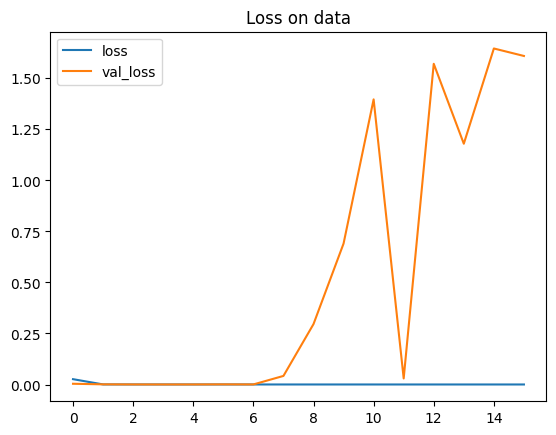

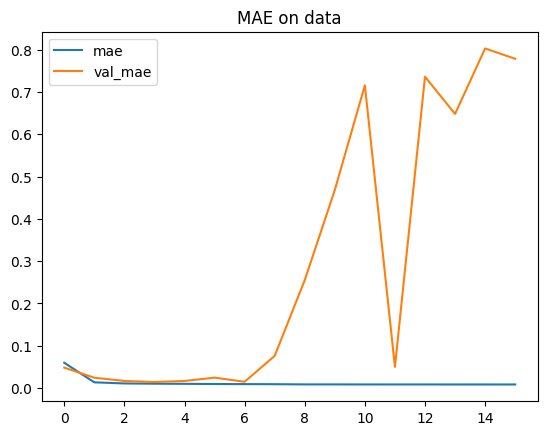

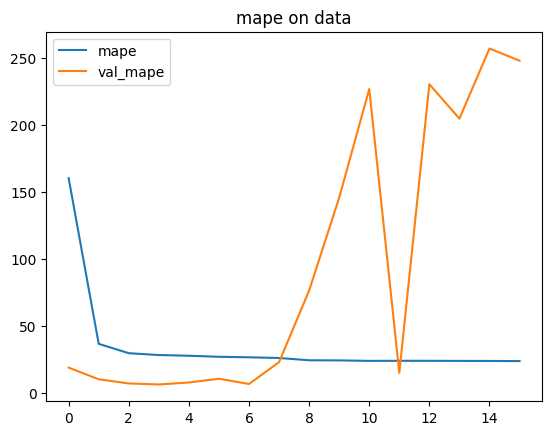

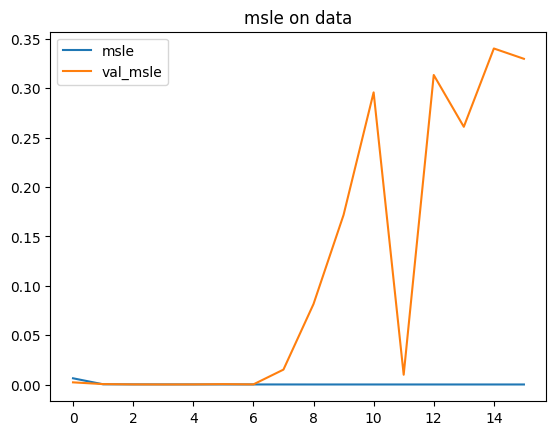

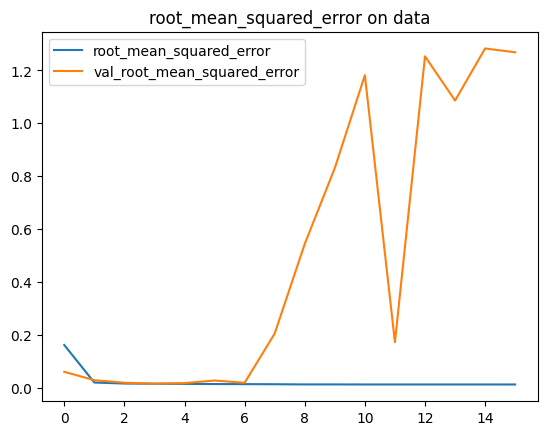

In [ ]:
plt.title("Loss on data")
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

plt.title("MAE on data")
plt.plot(r.history['mae'], label="mae")
plt.plot(r.history['val_mae'], label="val_mae")
plt.legend()
plt.show()

plt.title("mape on data")
plt.plot(r.history['mape'], label="mape")
plt.plot(r.history['val_mape'], label="val_mape")
plt.legend()
plt.show()

plt.title("msle on data")
plt.plot(r.history['msle'], label="msle")
plt.plot(r.history['val_msle'], label="val_msle")
plt.legend()
plt.show()

plt.title("root_mean_squared_error on data")
plt.plot(r.history['root_mean_squared_error'], label="root_mean_squared_error")
plt.plot(r.history['val_root_mean_squared_error'], label="val_root_mean_squared_error")
plt.legend()
plt.show()




In [ ]:
m_label = "GeneratedBTCUSD"
best_model = load_model(m_label + 'lstm_best.keras')

In [ ]:
y_pred = best_model.predict(X_test)

359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
print(y_pred.shape)

(11477, 3)


In [ ]:
#_,y_test = inverse_transform_data(scaled_y=y_test)
#_,y_pred = inverse_transform_data(scaled_y=y_pred)
print(y_test, " comparing to ", y_pred)

[[0.32184867 0.32178273 0.32187036]
 [0.32178273 0.32187036 0.32183421]
 [0.32187036 0.32183421 0.32161626]
 ...
 [0.34066881 0.34058088 0.34068711]
 [0.34058088 0.34068711 0.34058391]
 [0.34068711 0.34058391 0.34052088]]  comparing to  [[0.3010669  0.3008116  0.3006506 ]
 [0.30106267 0.3008073  0.30064636]
 [0.30107477 0.3008193  0.30065835]
 ...
 [0.3178857  0.31758347 0.31742108]
 [0.31788066 0.31757835 0.31741598]
 [0.3179296  0.31762722 0.31746483]]


In [ ]:
# 1. Calculate the error (the gap between actual and predicted)
error = y_test - y_pred

# 2. Calculate the average gap (the bias)
average_gap = np.mean(error)
print(f"Average Gap (Bias): {average_gap:.7f}")

# 3. Add the average gap to your predictions to create a corrected version
y_pred_corrected = y_pred + average_gap

# --- Verification ---
# Let's check the first predicted value vs. the first actual value
print("\n--- Example of Correction ---")
print(f"Original Prediction: {y_pred[0, 0]:.7f}")
print(f"Corrected Prediction: {y_pred_corrected[0, 0]:.7f}")
print(f"Actual Value:        {y_test[0, 0]:.7f}")

Average Gap (Bias): 0.0213002

--- Example of Correction ---
Original Prediction: 0.3010669
Corrected Prediction: 0.3223671
Actual Value:        0.3218487


In [ ]:
print("R^2 value for ", m_label)
print(r2_score(y_test, y_pred_corrected))

R^2 value for  GeneratedBTCUSD
0.966768747195876


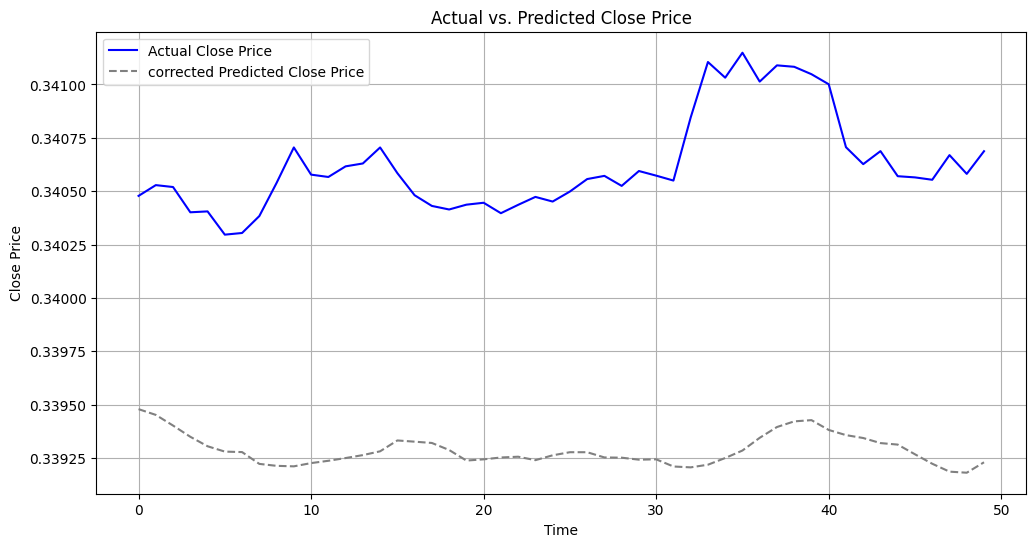

In [ ]:




plt.figure(figsize=(12, 6))
plt.plot(y_test[-50:, 0], label='Actual Close Price', color='blue')
#plt.plot(y_pred[-50:, 0], label='Predicted Close Price', color='red', linestyle='--')
plt.plot(y_pred_corrected[-50:, 0], label='corrected Predicted Close Price', color='gray', linestyle='--')
plt.title('Actual vs. Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()
